본 글에서 사용한 자료는 KOBIS의 영화관 통계 자료로, 아래 사용한 자료의 깃허브 주소를 남긴다. 이름이 가장 긴 xlsx 파일 두 개가 해당된다.

https://github.com/Open-Knowledge-Korea/covid-19-our-memory/tree/master/data/culture/Film%20industry


2020년 자료는 7월 23일까지를 기준으로 한다.

2019년 자료는 8월~12월 자료를 삭제, 수정하여 사용했다.

한국 영화, 외국 영화 구분 없이, 전체 영화에 대한 분석이다.

In [98]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [99]:
last_mov = pd.read_excel('C:\\Users\\GMS\\Desktop\\KOBIS_총_관객수_및_매출액_월별_2019년.xlsx', encoding='utf-8', header=4)
this_mov = pd.read_excel('C:\\Users\\GMS\\Desktop\\KOBIS_총_관객수_및_매출액_월별_2020년.xlsx', encoding='utf-8', header=4)

In [100]:
last_mov

,년월,한국,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,외국,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,전체,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,개봉편수,상영편수,매출액,관객수,점유율,개봉편수,상영편수,매출액,관객수,점유율,개봉편수,상영편수,매출액,관객수
1,2019-01-01 00:00:00,46,130,99614450357,11950823,0.659,101,239,51547027839,6171620,0.341,147,369,151161478196,18122443
2,2019-02-01 00:00:00,33,108,146336183090,17228752,0.773,81,209,43654624880,5048981,0.227,114,317,189990807970,22277733
3,2019-03-01 00:00:00,46,134,53449954665,6267605,0.427,96,239,73109062784,8404088,0.573,142,373,126559017449,14671693
4,2019-04-01 00:00:00,51,144,23535916622,2871973,0.215,104,292,89648754770,10466990,0.785,155,436,113184671392,13338963
5,2019-05-01 00:00:00,59,164,72430147833,8614235,0.477,93,293,82132857124,9448222,0.523,152,457,154563004957,18062457
6,2019-06-01 00:00:00,44,139,84708194720,9943592,0.435,109,315,110529603988,12901987,0.565,153,454,195237798708,22845579
7,2019-07-01 00:00:00,54,139,25376188033,3340740,0.152,104,284,158725114684,18575725,0.848,158,423,184101302717,21916465
8,합계,333,958,505451035320,60217720,3.138,688,1871,609347046069,71017613,3.862,1021,2829,1114798081389,131235333


In [101]:
this_mov

,년월,한국,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,외국,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,전체,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,개봉편수,상영편수,매출액,관객수,점유율,개봉편수,상영편수,매출액,관객수,점유율,개봉편수,상영편수,매출액,관객수
1,2020-01-01 00:00:00,59,138,99273272998,11588401,0.688,106,263,44407794932,5255295,0.312,165,401,143681067930,16843696
2,2020-02-01 00:00:00,59,137,41726340280,4942411,0.67,91,223,20575345700,2429741,0.33,150,360,62301685980,7372152
3,2020-03-01 00:00:00,51,87,2526011700,307866,0.168,103,255,12626729250,1526859,0.832,154,342,15152740950,1834725
4,2020-04-01 00:00:00,71,128,1120062760,146076,0.15,109,300,6395637280,826500,0.85,180,428,7515700040,972576
5,2020-05-01 00:00:00,65,143,1742857320,220163,0.144,92,284,10650943680,1306084,0.856,157,427,12393801000,1526247
6,2020-06-01 00:00:00,59,140,24208913380,2786460,0.721,77,270,8551313420,1078083,0.279,136,410,32760226800,3864543
7,2020-07-01 00:00:00,32,109,26744533680,3082484,0.83,64,251,5036375070,633263,0.17,96,360,31780908750,3715747
8,합계,396,882,197341992118,23073861,0.639,642,1846,108244139332,13055825,0.361,1038,2728,305586131450,36129686


In [102]:
#한국 영화, 외국 영화 column 삭제 - 전체만 볼 것.
last_mov.drop(['한국', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
              '외국', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
              'Unnamed: 10'], axis='columns', inplace=True)
this_mov.drop(['한국', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
              '외국', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
              'Unnamed: 10'], axis='columns', inplace=True)

#19년 column 이름 변경
last_mov = last_mov.rename(columns={last_mov.columns[0]:'년월',
                                     last_mov.columns[1]:'전체 개봉편수',
                                     last_mov.columns[2]:'전체 상영편수',
                                     last_mov.columns[3]:'전체 매출액',
                                     last_mov.columns[4]:'전체 관객수'})
last_mov = last_mov.drop(index=0) # 1행 삭제

#20년 column 이름 변경
this_mov = this_mov.rename(columns={this_mov.columns[0]:'년월',
                                     this_mov.columns[1]:'전체 개봉편수',
                                     this_mov.columns[2]:'전체 상영편수',
                                     this_mov.columns[3]:'전체 매출액',
                                     this_mov.columns[4]:'전체 관객수'})
this_mov = this_mov.drop(index=0) # 1행 삭제

In [103]:
#인덱스를 '년월'로 지정
last_mov.set_index('년월', inplace=True)
this_mov.set_index('년월', inplace=True)

last_mov.index=['19년 1월', '19년 2월', '19년 3월', '19년 4월', '19년 5월', 
                '19년 6월', '19년 7월', '19년 합계']
this_mov.index=['20년 1월', '20년 2월', '20년 3월', '20년 4월', '20년 5월', 
                '20년 6월', '20년 7월', '20년 합계']

In [104]:
#2019년 통계
last_mov

,전체 개봉편수,전체 상영편수,전체 매출액,전체 관객수
19년 1월,147,369,151161478196,18122443
19년 2월,114,317,189990807970,22277733
19년 3월,142,373,126559017449,14671693
19년 4월,155,436,113184671392,13338963
19년 5월,152,457,154563004957,18062457
19년 6월,153,454,195237798708,22845579
19년 7월,158,423,184101302717,21916465
19년 합계,1021,2829,1114798081389,131235333


In [105]:
#2020년 통계
this_mov

,전체 개봉편수,전체 상영편수,전체 매출액,전체 관객수
20년 1월,165,401,143681067930,16843696
20년 2월,150,360,62301685980,7372152
20년 3월,154,342,15152740950,1834725
20년 4월,180,428,7515700040,972576
20년 5월,157,427,12393801000,1526247
20년 6월,136,410,32760226800,3864543
20년 7월,96,360,31780908750,3715747
20년 합계,1038,2728,305586131450,36129686


# 분석

총 합계 비교

In [112]:
# 19년과 20년 총 합계
last_sum = last_mov.loc['19년 합계']
this_sum = this_mov.loc['20년 합계']

year_sum = {'전체 개봉편수':[last_mov['전체 개봉편수'][-1], this_mov['전체 개봉편수'][-1]],
            '전체 상영편수':[last_mov['전체 상영편수'][-1], this_mov['전체 상영편수'][-1]],
            '전체 매출액':[last_mov['전체 매출액'][-1], this_mov['전체 매출액'][-1]],
            '전체 관객수':[last_mov['전체 관객수'][-1], this_mov['전체 관객수'][-1]]}

year_sum

{'전체 개봉편수': [1021, 1038],
 '전체 상영편수': [2829, 2728],
 '전체 매출액': [1114798081389, 305586131450],
 '전체 관객수': [131235333, 36129686]}

In [118]:
# 총 합계 비교
from pandas import Series, DataFrame

data = DataFrame(year_sum)
data.index = ['2019년', '2020년']
print(data)

       전체 개봉편수  전체 상영편수         전체 매출액     전체 관객수
2019년     1021     2829  1114798081389  131235333
2020년     1038     2728   305586131450   36129686


개봉편수 비교

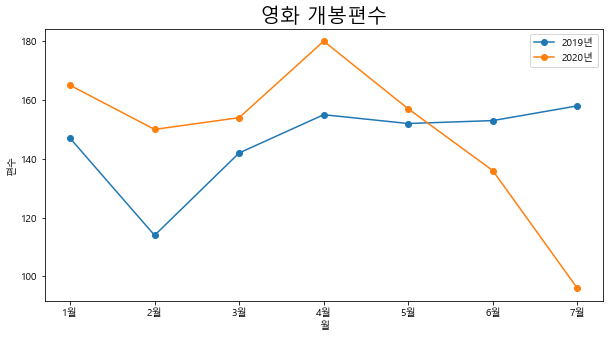

In [121]:
x = ['1월', '2월', '3월', '4월', '5월', '6월', '7월']
y1 = last_mov['전체 개봉편수'][:-1]
y2 = this_mov['전체 개봉편수'][:-1]

plt.figure(figsize=(10,5))
plt.title('영화 개봉편수', size=20)
plt.xlabel('월')
plt.ylabel('편수')

plt.plot(x, y1, label='2019년', marker='o')
plt.plot(x, y2, label='2020년', marker='o')
plt.legend()

plt.show()

상영편수 비교

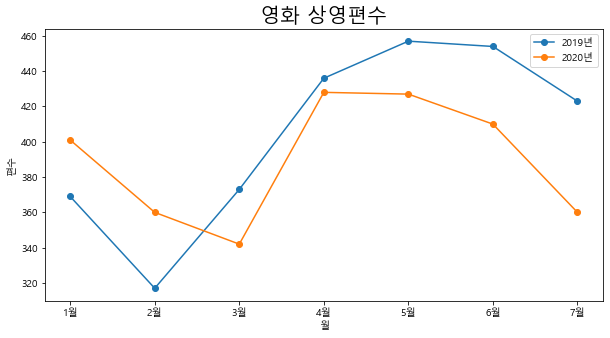

In [122]:
x = ['1월', '2월', '3월', '4월', '5월', '6월', '7월']
y1 = last_mov['전체 상영편수'][:-1]
y2 = this_mov['전체 상영편수'][:-1]

plt.figure(figsize=(10,5))
plt.title('영화 상영편수', size=20)
plt.xlabel('월')
plt.ylabel('편수')

plt.plot(x, y1, label='2019년', marker='o')
plt.plot(x, y2, label='2020년', marker='o')
plt.legend()

plt.show()

매출액 비교

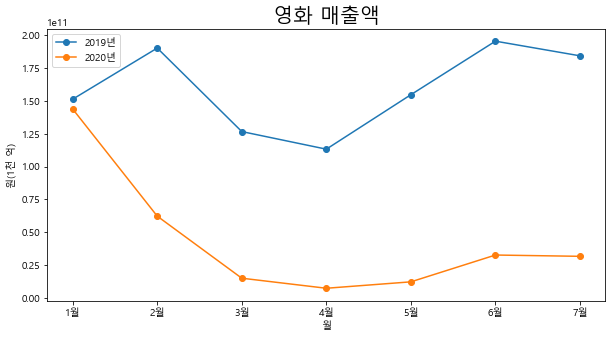

In [128]:
x = ['1월', '2월', '3월', '4월', '5월', '6월', '7월']
y1 = last_mov['전체 매출액'][:-1]
y2 = this_mov['전체 매출액'][:-1]

plt.figure(figsize=(10,5))
plt.title('영화 매출액', size=20)
plt.xlabel('월')
plt.ylabel('원(1천 억)')

plt.plot(x, y1, label='2019년', marker='o')
plt.plot(x, y2, label='2020년', marker='o')
plt.legend()

plt.show()

관객수 비교

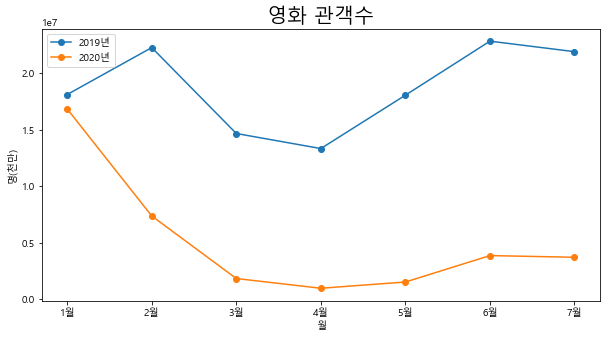

In [129]:
x = ['1월', '2월', '3월', '4월', '5월', '6월', '7월']
y1 = last_mov['전체 관객수'][:-1]
y2 = this_mov['전체 관객수'][:-1]

plt.figure(figsize=(10,5))
plt.title('영화 관객수', size=20)
plt.xlabel('월')
plt.ylabel('명(천만)')

plt.plot(x, y1, label='2019년', marker='o')
plt.plot(x, y2, label='2020년', marker='o')
plt.legend()

plt.show()